<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/dsp_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#ナムパイ
import numpy as np
#グラフ
import matplotlib.pyplot as plt

#フーリエ変換等
from numpy.fft import fft , ifft


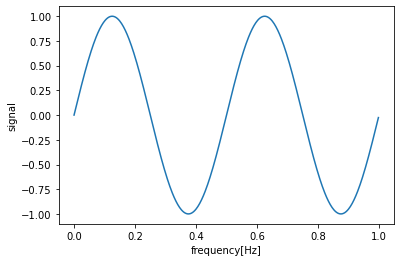

In [91]:
#フーリエ変換を行ってみる
#1.信号を用意
#サンプル周波数
fs = 500
#時間軸
t = np.arange( 0 , 1 , 1/fs )
#周波数
f = 2
#信号
signal = np.sin( 2*np.pi*f*t )

#グラフの表示
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal" )
plt.plot( t , signal )


In [92]:
#フーリエ変換を行ってみる
#2.フーリエ変換をする
#結果
S = fft( signal )

#長さを表示
print( "配列の長さ:" , len( S ) )


配列の長さ: 500


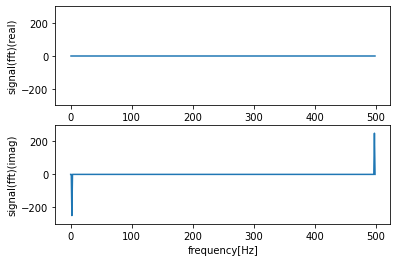

In [93]:
#フーリエ変換を行ってみる
#3.変換結果を表示
#実数部
plt.subplot( 2 , 1 , 1 )
plt.ylim( -300 , 300 )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(real)" )
plt.plot( S.real )
  #虚数部
plt.subplot( 2 , 1 , 2 )
plt.ylim( -300 , 300 ) 
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(imag)" )
plt.plot( S.imag )


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


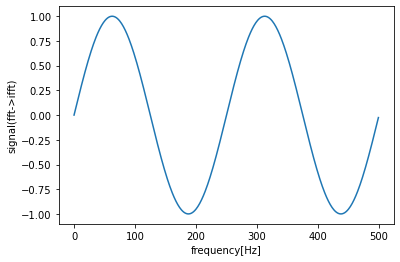

In [94]:
#フーリエ変換を行ってみる
#3.逆変換をする
iS = ifft( S )

#表示
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->ifft)" )
plt.plot( iS )


Text(0, 0.5, 'amplitude ')

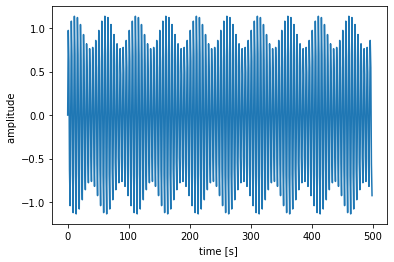

In [95]:
#解析的信号を作成する
#時間信号を作成する
fs = 500
t = np.arange( 0 , 1 , 1/fs )
#搬送波の周波数
#f1 = 15
#f1 = 30
#f1 = 7
f1 = 100
#包絡線の周波数
#f2 = 2
f2 = 10
#信号
h = np.sin( 2*np.pi*f1*t ) * ( 1 + 0.2*np.sin( 2*np.pi*f2*t ) )

#表示
plt.plot( h )
plt.xlabel( "time [s] " )
plt.ylabel( "amplitude " )



500


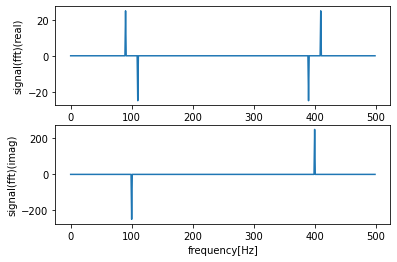

In [96]:
#解析的信号を作成する
#1.時間信号をフーリエ変換
H = fft( h )

#長さを取得、表示
N = len( H )
print( N )
#実数部
plt.subplot( 2 , 1 , 1 )
#plt.ylim( -300 , 300 )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(real)" )
plt.plot( H.real )
#虚数部
plt.subplot( 2 , 1 , 2 )
#plt.ylim( -300 , 300 ) 
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(imag)" )
plt.plot( H.imag )



長さ: 500


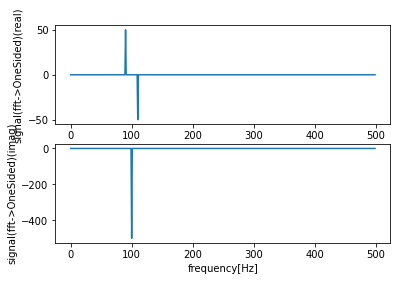

In [97]:
#解析的信号を作成する
#2.片側スペクトルに変換
#変換
H_sided = H
for k in range( 0 , N , 1 ) :
  if k == 0 or k == N//2 :
    H_sided[ k ] = H[ k ]
  elif k > 0 and k < N//2 :
    H_sided[ k ] = 2*H[ k ]
  else :
    H_sided[ k ] = 0

#表示
print( "長さ:" , len( H_sided ) )
#実数部
plt.subplot( 2 , 1 , 1 )
#plt.ylim( -300 , 300 )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided)(real)" )
plt.plot( H_sided.real )
#虚数部
plt.subplot( 2 , 1 , 2 )
#plt.ylim( -300 , 300 ) 
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided)(imag)" )
plt.plot( H_sided.imag )


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


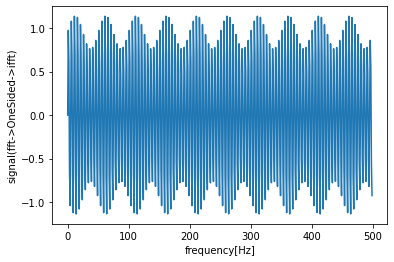

In [98]:
#解析的信号を作成する
#3.片側スペクトルを逆フーリエ変換する
h_sided = ifft( H_sided )

#表示
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided->ifft)" )
plt.plot( h_sided )


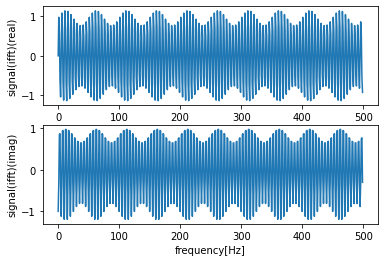

In [99]:
#解析的信号を作成する
#3-2.片側スペクトルを逆フーリエ変換する
#実数部
plt.subplot( 2 , 1 , 1 )
#plt.ylim( -300 , 300 )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(ifft)(real)" )
plt.plot( h_sided.real )
#虚数部
plt.subplot( 2 , 1 , 2 )
#plt.ylim( -300 , 300 ) 
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(ifft)(imag)" )
plt.plot( h_sided.imag )

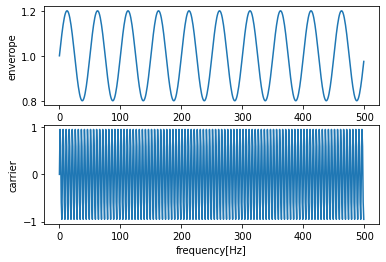

In [100]:
#解析的信号を作成する
#4.包絡線/搬送波を取得する
#包絡線
env = np.abs( h_sided )
#搬送波
car = np.cos( np.angle( h_sided ) )

#表示
#包絡線
plt.subplot( 2 , 1 , 1 )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "enverope" )
plt.plot( env )
#搬送波
plt.subplot( 2 , 1 , 2 )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "carrier" )
plt.plot( car )




Text(0, 0.5, 'amplitude ')

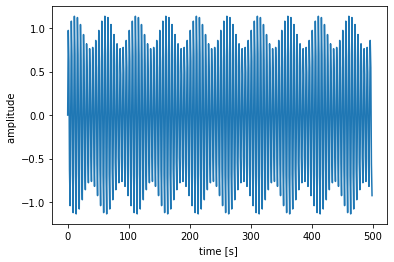

In [101]:
#解析的信号を作成する
#4-2.もtの信号を表示する
plt.plot( h )
plt.xlabel( "time [s] " )
plt.ylabel( "amplitude " )

